# BUSINESS UNDERSTANDING

## Introduction

Breast cancer is an uncontrolled growth of breast cells. To better understand breast cancer, it helps to understand how any cancer can develop.<br>

Cancer occurs as a result of mutations, or abnormal changes, in the genes responsible for regulating the growth of cells and keeping them healthy. The genes are in each cell’s nucleus, which acts as the “control room” of each cell. Normally, the cells in our bodies replace themselves through an orderly process of cell growth: healthy new cells take over as old ones die out. But over time, mutations can “turn on” certain genes and “turn off” others in a cell. That changed cell gains the ability to keep dividing without control or order, producing more cells just like it and forming a tumor.<br>

A tumor can be benign (not dangerous to health) or malignant (has the potential to be dangerous). Benign tumors are not considered cancerous: their cells are close to normal in appearance, they grow slowly, and they do not invade nearby tissues or spread to other parts of the body. Malignant tumors are cancerous. Left unchecked, malignant cells eventually can spread beyond the original tumor to other parts of the body.<br>

The term “breast cancer” refers to a malignant tumor that has developed from cells in the breast.It's not always clear-cut whether a tumor is benign or malignant, and doctor use several different factors to diagnose it as one or the other.<br>

Fine needle aspiration cytology (FNAC) entails using a narrow gauge (25-22G) needle to collect a sample of a lesion for microscopic examination. It allows a minimally invasive, rapid diagnosis of tissue but does not preserve its histological architecture. In some cases this limits the ability to make a definitive diagnosis.It has been routinely employed as a screening test for the breast cancer along with mammography and the clinical examination. However, cytological diagnosis is based on the subjective evaluation of nuclear features and thus, may raise a difficulty in establishing the precise diagnosis pre-operatively.Machine learning algorithms will help avoid this error by automating the process.<br> 
source :https://www.breastcancer.org/symptoms/understand_bc/what_is_bc

## Predict whether the tumor is benign or malignant
The purpose of this project is to find the best predictive model to predict whether the tumor is malignant or benign by using an information collected a FINE NEEDLE ASPIRATION CYTOLOGY screening test.I am using Wisconsin hospital's data set.The data set has 569 cases and 32 features and it is available at the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

##### Features info: 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.The first column is the id and the second one is Diagnosis (M = malignant, B = benign) for features 3-32:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)<br> b) texture (standard deviation of gray-scale values) <br>c) perimeter <br>d) area <br> e) smoothness (local variation in radius lengths) <br>f) compactness (perimeter^2 / area - 1.0)<br>g) concavity (severity of concave portions of the contour)<br> h) concave points (number of concave portions of the contour)<br> i) symmetry<br> j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 



# DATA MINING

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import precision_score ,recall_score, f1_score
from sklearn.metrics import accuracy_score

In [36]:
#use this code to be able to display all the output in the cell instead of only displaying the out put for the last one. see the next cell.
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [102]:
df = pd.read_csv ('breast cancer data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


# DATA CLEANING
I will be using pandas profiling method to get valuable info about the data which includes the distribution, missing values,duplicate values,correlation, minimum & maximum values and etc. 


In [9]:
pandas_profiling.ProfileReport(df)

Number of variables,32
Number of observations,569
Total Missing (%),0.0%
Total size in memory,142.3 KiB
Average record size in memory,256.1 B
Numeric,21
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,10


In [38]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="Breast Cancer data profiling.html") # to create HTML file for the report

<div class="alert alert-block alert-info">
<b>Summary:</b> There are no missing or duplicate values and 37 percent of the cases are malignant. Area , texture and radius are correlated in all the measurements which are mean,standard error and worst. Due to multicollinearity,the features are narrowed down to 20 features. In addition to the correlation info,I will be using other methods to choose better features to predict the tumor. <br> <br>
From our pandas profiling report we can see that:<br>
1.radius_mean, perimeter_mean and area_mean are correlated.<br>2.concavity_mean, concave points_mean & concave points_worst are correlated.<br>3.radius_worst ,perimeter_worst and area_worst are correlated.<br>4.radius_se, 'perimeter_se and area_seare correlated<br>5.texture_mean & texture_worst are correlated.<br> 

</div>

<div class="alert alert-block alert-danger">
Since the features have different scales, we need to normalize them. 
</div>

# DATA EXPLORATION & VISUALIZATION

In [12]:
y =df['diagnosis'].map({'B':0,'M':1})# target variable
X= df.drop((['diagnosis','id']), axis=1) # features after dropping the  target (diagnosis) & ID
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


I will use a swarm plot to have an initial look on how clearly each feature is explaining the diagnosis & here are the steps I followed.<br>
 1. Standardize the features data (X) & concat with the class label (y)<br> 
 2. melt the data from wide format to long format (I will split the data into two groups to help me see the plots clearly).<br> 
 3. plot a violin,box & swarm plots using seaborn 


###### Scaling

In [14]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
# Transform the features
scaled_x = scaler.fit_transform(X)
scaled_x_df=pd.DataFrame(scaled_x, columns = X.columns)

###### Split & melt

In [15]:
# concat label y (diagnosis) & the first fifteen features  
data_15_first = pd.concat([y,scaled_x_df.iloc[:,0:15]],axis=1) # split the data to help see the plots clearly
data_15_first = pd.melt(data_15_first,id_vars="diagnosis", # change the data from wide format to long format
                    var_name="features",
                    value_name='value')

data_15_last = pd.concat([y,scaled_x_df.iloc[:,15:31]],axis=1)
data_15_last = pd.melt(data_15_last,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

######  Swarm Plot

<Figure size 1000x1000 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

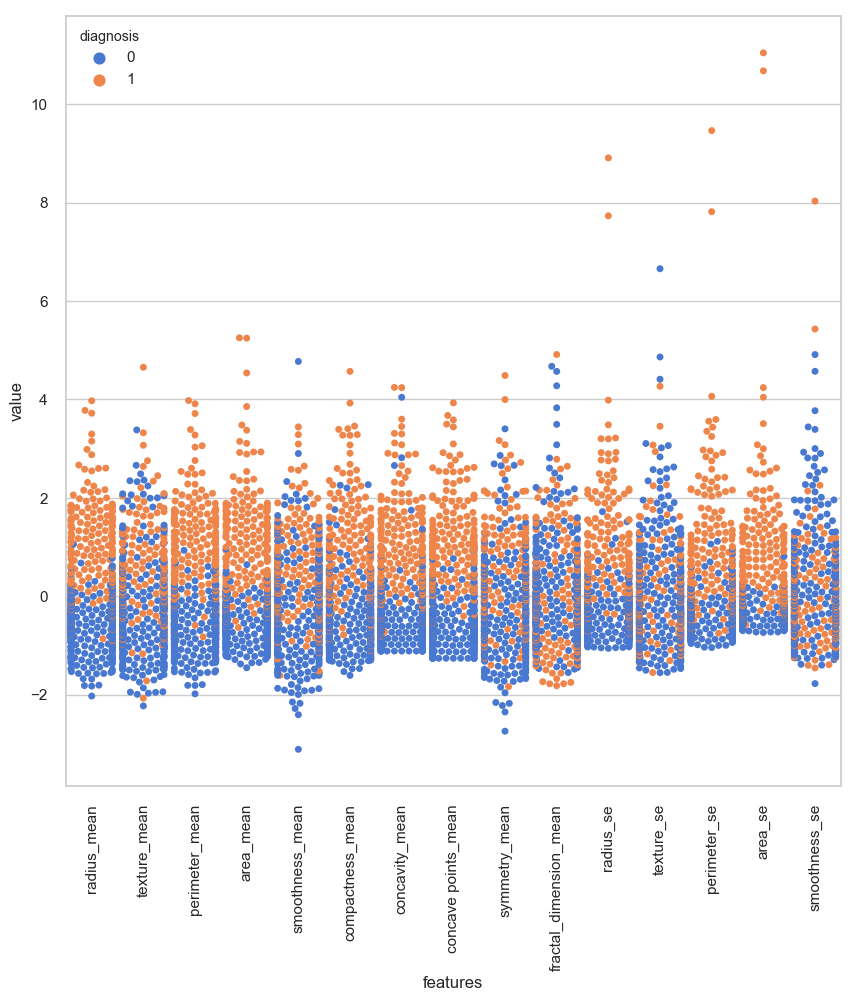

In [16]:
sns.set(style="whitegrid", palette="muted")# ?
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_15_first)
plt.xticks(rotation=90)

<Figure size 1000x1000 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

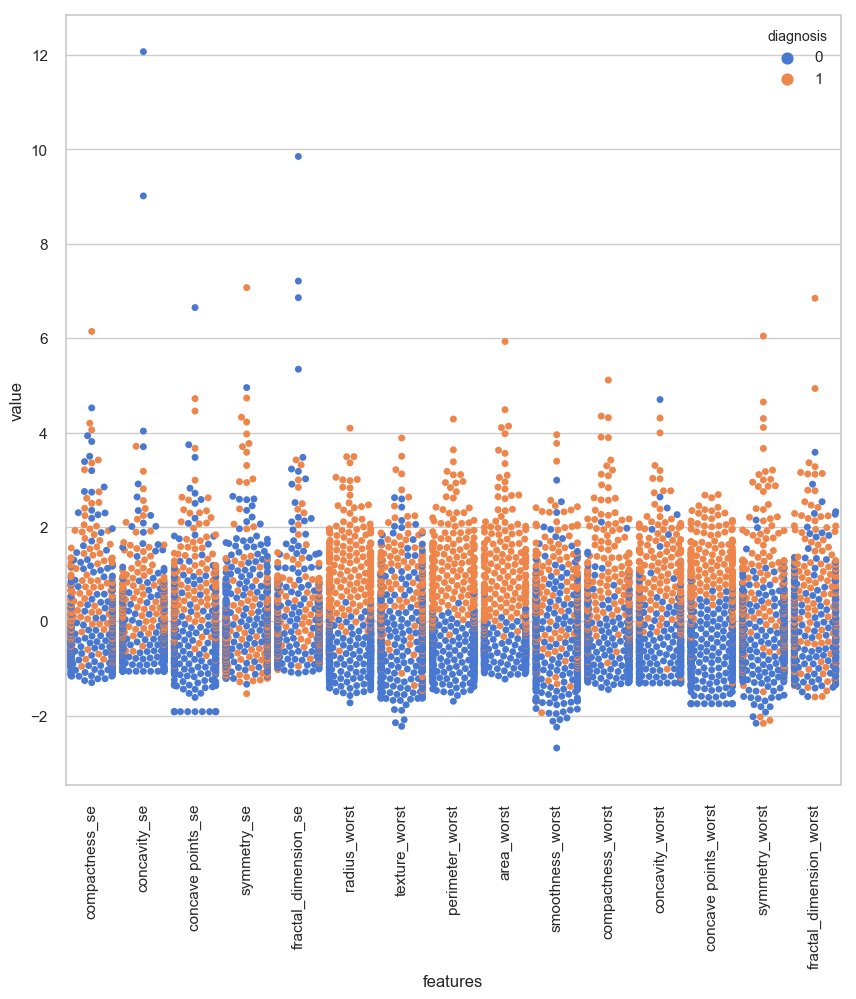

In [16]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_15_last)
plt.xticks(rotation=90)

<div class="alert alert-block alert-info">
<b>Summary:</b> The plots show that fractal_dimension_worst ,smoothness_se & symmetry_se do not linearly separate the target. 
</div>

# FEATURE ENGINEERING

## Feature selection using correlation & visualization:
From the correlation & the visualization info we can learn that the fractal_dimension_worst ,smoothness_se & symmetry_se
are not performing well. we have both malignant & benign no mater if their value is high or low and ten features are highly correlated.which will left us with 17 important features.To confirm this I will use Scikit-Learn feature selection methods.  

## Univariate feature selection:
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.SelectKBest is one of the univariate method & it removes all but the K highest scoring features. the problem with this method is that the number of features k needs to be predetermine. But it is still useful filter the top the best performing features.I will use the following steps:<br><br> 1.Drop the highly correlated features from the scaled features <br> 2.Split data to train & test <br> 3.Run SelectKbest model  


###### Drop the highly correlated features 

In [40]:
#profile.get_description() #
rejected_features= list(profile.get_rejected_variables()) # variables rejected due to high correlation 
rejected_features

['area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']

In [121]:
df_twenty = df.drop(rejected_features,axis=1) # dropping the 10 highly correlated features
df_twenty=df_twenty.drop((['diagnosis','id']), axis=1)
X_drop= X.drop(rejected_features,axis=1) # X had 30  features before 
X_drop.shape
df_twenty.shape

(569, 20)

(569, 20)

###### Train test split

In [122]:
# split data train 70 % and test 30 %
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)
x_train.shape
x_test.shape

(398, 20)

(171, 20)

In [39]:
# m_df =df[df.diagnosis == 'M']
# b_df =df[df.diagnosis == 'B']
# m_df.describe()
# b_df.describe()

## Recursive feature elimination:
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. Like the k best method the number of features need to be predetermined. 


In [123]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(random_state = 42)
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x_train, y_train)

rfe_mask = selector.get_support() # list of booleans True for selected features & False for non selected
new_features = [] # The list of K best features

for bool, feature in zip(rfe_mask, x_train.columns):
    if bool:
        new_features.append(feature)
new_features # the 5 best  features        

['radius_mean',
 'concavity_mean',
 'radius_se',
 'smoothness_worst',
 'concavity_worst']

In [124]:
# create a data frame using the 5 best features
df_five = df[['radius_mean',
 'concavity_mean',
 'radius_se',
 'smoothness_worst',
 'concavity_worst']]

## Optimal number of features using cross validation:

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Optimal number of features : 13
Best features : ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'smoothness_se', 'symmetry_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


<Figure size 576x576 with 0 Axes>

<BarContainer object of 20 artists>

([<matplotlib.axis.YTick at 0x1f1e4886198>,
 <a list of 20 Text yticklabel objects>)

Text(0.5, 0, 'Feature importance')

Text(0, 0.5, 'Feature')

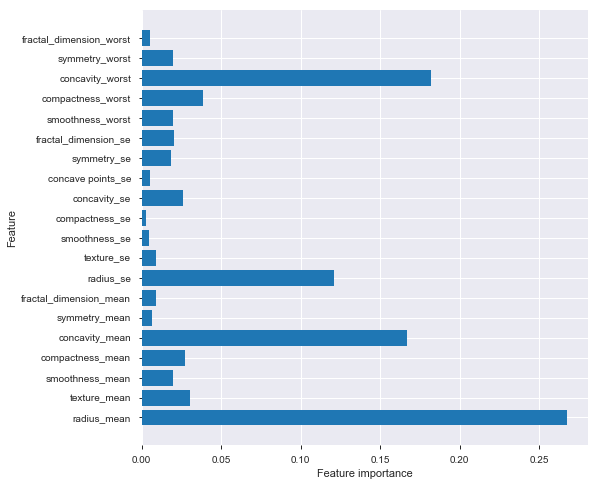

(398, 20)

In [125]:
from sklearn.feature_selection import RFECV
cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(x_train, y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(x_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans

rfecv_features = [] # The list of your K best features

for bool, feature in zip(rfecv_mask, x_train.columns):
    if bool:
        rfecv_features.append(feature)

print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = x_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), x_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()
x_train.shape

<div class="alert alert-block alert-info">
<b>Summary:</b> by just using correlation & visualization we were able to come up 17 features. But after using the RFECV we learned that the optimal number of features is 13 and the best features are:<br>'radius_mean', 'texture_mean', 'compactness_mean', 'concavity_mean', 'fractal_dimension_mean', 'radius_se', 'concavity_se', 'fractal_dimension_se', 'concavity_worst' and 'symmetry_worst'
</div>

In [126]:
df_thirteen = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concave points_mean',
         'fractal_dimension_mean', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
         'fractal_dimension_se']]
df_thirteen.shape

(569, 13)

# PREDICTIVE MODELING

The next step is to fit the models by using the different combination of features with the following steps:<br>
1.Create an instance of a classifier model <br>
2.Fit the training data to the model<br>
3.Use the trained model to make predictions with test data & train data. <br>
4.Evaluate model performance<br>
5.Improve model performance:by using hyper parameter tuning.<br>
6.Check Specially the recall score

###### Model performance metrics:
The model accuracy function computes the accuracy that the set of labels predicted for a sample must *exactly* match the corresponding set of labels in true target value.<br><br>
The recall score is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of true positives and ``fn`` the number of false negatives. It is intuitively the ability of the classifier to find all the positive samples.<br><br>
The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives.It is the ability of the classifier not to label as positive a sample that is negative.



In [127]:
def fit_model_accuracy(model, df):
    x_train,x_test,y_train,y_test = train_test_split(df, y, test_size=0.3, random_state=42)
#Fit the model:
    model.fit(x_train,y_train)
  
  #Make predictions on training set:
    train_predict = model.predict(x_train)
  #Make predictions on test set:
    test_predict= model.predict(x_test)
  #Print accuracy
    recall_accuracy = recall_score(test_predict,y_test )
    precision_accuracy = precision_score(test_predict,y_test )
    model_accuracy_test =accuracy_score(test_predict,y_test)*100
    model_accuracy_train = accuracy_score(train_predict,y_train)*100
    print("The train model accuracy is : {0}".format(model_accuracy_train))
    print("The test model accuracy is : {0}".format(model_accuracy_test))
    print("The precision score is : {0}".format(precision_accuracy))
    print("The recall score is : {0}".format(recall_accuracy))

In [51]:
import lazypredict
from lazypredict.Supervised import Classification
clf = Classification()
clf.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 13.65it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score
Model,,,,
CalibratedClassifierCV,0.98,0.98,0.98,0.98
PassiveAggressiveClassifier,0.98,0.98,0.98,0.98
LogisticRegression,0.98,0.98,0.98,0.98
LinearSVC,0.97,0.97,0.97,0.97
MLPClassifier,0.97,0.97,0.97,0.97
LogisticRegressionCV,0.97,0.97,0.97,0.97
GradientBoostingClassifier,0.97,0.97,0.97,0.97
QuadraticDiscriminantAnalysis,0.96,0.97,0.97,0.97
Perceptron,0.96,0.96,0.96,0.96


## Naive Bayes Classifier

In [109]:
from sklearn.naive_bayes import GaussianNB
clf_naive = GaussianNB()
print('using the 5 best features')
fit_model_accuracy(clf_naive, df_five)
print('using the 13 optimal features')
fit_model_accuracy(clf_naive, df_thirteen)
print('using the 20 features')
fit_model_accuracy(clf_naive, df_twenty)

using the 5 best features
The train model accuracy is : 92.71356783919597
The test model accuracy is : 92.98245614035088
The precision score is : 0.873015873015873
The recall score is : 0.9322033898305084
using the 13 optimal features
The train model accuracy is : 91.4572864321608
The test model accuracy is : 92.98245614035088
The precision score is : 0.8571428571428571
The recall score is : 0.9473684210526315
using the 20 features
The train model accuracy is : 91.4572864321608
The test model accuracy is : 91.22807017543859
The precision score is : 0.8571428571428571
The recall score is : 0.9


## Random Forest Classifier

In [111]:
clf_random_f = RandomForestClassifier(random_state =10)
print('using the 5 best features')
fit_model_accuracy(clf_random_f, df_five)
print('using the 13 optimal features')
fit_model_accuracy(clf_random_f, df_thirteen)
print('using the 20 features')
fit_model_accuracy(clf_random_f, df_twenty)

using the 5 best features
The train model accuracy is : 99.49748743718592
The test model accuracy is : 94.73684210526315
The precision score is : 0.9047619047619048
The recall score is : 0.95
using the 13 optimal features
The train model accuracy is : 100.0
The test model accuracy is : 92.98245614035088
The precision score is : 0.8888888888888888
The recall score is : 0.9180327868852459
using the 20 features
The train model accuracy is : 99.74874371859298
The test model accuracy is : 96.49122807017544
The precision score is : 0.9206349206349206
The recall score is : 0.9830508474576272


### Random Forest Classifier Tuning

In [112]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 4, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}
rf_grid_search = GridSearchCV(clf_random_f, rf_param_grid, cv=3)
rf_grid_search.fit(x_train, y_train)
print(f"Optimal Parameters: {rf_grid_search.best_params_}")


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 4, 6, 10], 'min_samples_split': [5, 10], 'min_samples_leaf': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [113]:
clf_rf_grid = RandomForestClassifier(criterion ='entropy', max_depth = 6, min_samples_leaf = 3, min_samples_split = 5, n_estimators = 100,random_state =10)

In [114]:
print('using the 5 best features')
fit_model_accuracy(clf_rf_grid, df_five)
print('using the 13 optimal features') 
fit_model_accuracy(clf_rf_grid, df_thirteen)
print('using the 20 features')
fit_model_accuracy(clf_rf_grid, df_twenty)

using the 5 best features
The train model accuracy is : 98.24120603015075
The test model accuracy is : 93.56725146198829
The precision score is : 0.8888888888888888
The recall score is : 0.9333333333333333
using the 13 optimal features
The train model accuracy is : 98.99497487437185
The test model accuracy is : 95.32163742690058
The precision score is : 0.9523809523809523
The recall score is : 0.9230769230769231
using the 20 features
The train model accuracy is : 98.99497487437185
The test model accuracy is : 95.32163742690058
The precision score is : 0.9206349206349206
The recall score is : 0.9508196721311475


## Logistic Regression Classifier

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logit_base = LogisticRegression(random_state = 18)
parameters = {'C': [0.03, 0.05, 0.08, 0.1, 0.3, 0.5, 10], 'penalty': ['l1', 'l2']}
logit_best = GridSearchCV(logit_base, param_grid = parameters, cv = 3) 
logit_best.fit(x_train, y_train)
print('using the 5 best features') 
fit_model_accuracy(logit_best, df_five)
print('using the 13 optimal features') 
fit_model_accuracy(logit_best, df_thirteen)
print('using the 20 features')
fit_model_accuracy(logit_best, df_twenty)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=18, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.03, 0.05, 0.08, 0.1, 0.3, 0.5, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

using the 5 best features
The train model accuracy is : 93.96984924623115
The test model accuracy is : 95.32163742690058
The precision score is : 0.9523809523809523
The recall score is : 0.9230769230769231
using the 13 optimal features
The train model accuracy is : 94.9748743718593
The test model accuracy is : 94.15204678362574
The precision score is : 0.9206349206349206
The recall score is : 0.9206349206349206
using the 20 features
The train model accuracy is : 97.98994974874373
The test model accuracy is : 98.83040935672514
The precision score is : 0.9841269841269841
The recall score is : 0.9841269841269841


## AdaBoost Classifier

In [116]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(n_estimators=100, random_state = 42)
print('using the 5 best features')
fit_model_accuracy(clf_adaboost, df_five)
print('using the 13 optimal features')
fit_model_accuracy(clf_adaboost, df_thirteen)
print('using the 20 features')
fit_model_accuracy(clf_adaboost, df_twenty)


using the 5 best features
The train model accuracy is : 100.0
The test model accuracy is : 94.15204678362574
The precision score is : 0.9365079365079365
The recall score is : 0.9076923076923077
using the 13 optimal features
The train model accuracy is : 100.0
The test model accuracy is : 92.98245614035088
The precision score is : 0.9206349206349206
The recall score is : 0.8923076923076924
using the 20 features
The train model accuracy is : 100.0
The test model accuracy is : 96.49122807017544
The precision score is : 0.9365079365079365
The recall score is : 0.9672131147540983


###### The train accuracy is 100 % & test accuracy is 96% the model is over fitting & it needs tunning.

### AdaBoost Classifier Tuning

In [117]:
ab_param_grid = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]}

ab_grid =  GridSearchCV(clf_adaboost,param_grid =ab_param_grid, cv=3,n_jobs=-1)
ab_grid.fit(x_train, y_train)
print(f"Optimal Parameters: {ab_grid.best_params_}")

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=42),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Optimal Parameters: {'learning_rate': 1, 'n_estimators': 50}


In [118]:
clf_adaboost_grid = AdaBoostClassifier(n_estimators=50, learning_rate = 1,random_state = 42)
print('using the 5 best features')
fit_model_accuracy(clf_adaboost_grid, df_five)
print('using the 13 optimal features')
fit_model_accuracy(clf_adaboost_grid, df_thirteen)
print('using the 20 features')
fit_model_accuracy(clf_adaboost_grid, df_twenty)


using the 5 best features
The train model accuracy is : 100.0
The test model accuracy is : 94.73684210526315
The precision score is : 0.9523809523809523
The recall score is : 0.9090909090909091
using the 13 optimal features
The train model accuracy is : 100.0
The test model accuracy is : 94.15204678362574
The precision score is : 0.9047619047619048
The recall score is : 0.9344262295081968
using the 20 features
The train model accuracy is : 100.0
The test model accuracy is : 94.73684210526315
The precision score is : 0.9206349206349206
The recall score is : 0.9354838709677419


In [119]:
df_twenty.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

###### The train accuracy is 100 % & test accuracy is 94% the AdaBoost classifier is still over fitting & the grid search didn't help.

<div class="alert alert-block alert-success">
<b>CONCLUSION:</b>
After fitting different models & checking the recall model accuracy, here is my conclusion:<br>
1.Using the 20 features improved the model performance.<br>    
2.Logistic regression the best classifier with 97% accuracy and 98% recall.
    
</div>

<div class="alert alert-block alert-warning">
<b>REFERENCES:</b> 
    https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection.
    https://www.kaggle.com/willkoehrsen/introduction-to-feature-selection#Conclusions
</div>